Pegar entradas e saídas de todas mencionadas, maiores variações, <br>
Pegar entradas e saídas do primeiro quartil<br>
Fazer avaliação semanal<br>
<br>
Talvez mais coisas




In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\TCC\\Projeto")

In [4]:
topH = pd.read_csv('TOPacoes220322.csv', sep = ',')
topO = pd.read_csv('TOPacoes210322.csv', sep = ',')
totH = pd.read_csv('Tacoes220322.csv', sep = ',')
totO = pd.read_csv('Tacoes210322.csv', sep = ',')

In [5]:
totH.describe()

,count
count,160.00000
mean,3.01875
std,3.32793
min,1.00000
25%,1.00000
50%,2.00000
75%,4.00000
max,19.00000


In [30]:
topH.head(20)

,word,count
0,petr4,19
1,jbss3,18
2,vale3,17
3,ceab3,17
4,posi3,15
5,mglu3,13
6,bmob3,12
7,tasa4,11
8,viia3,9
9,recv3,7


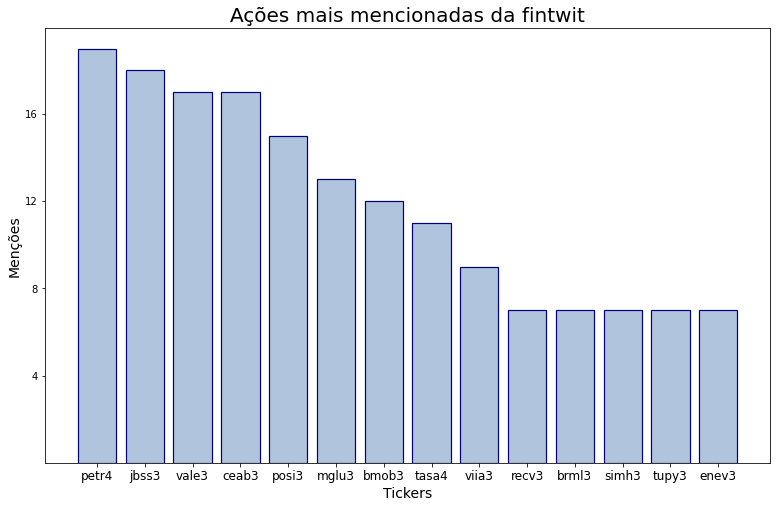

In [28]:
l = topH[:15]

plt.figure(figsize=(13,8))
plt.bar(l['word'],l['count'], color='lightsteelblue', edgecolor= 'navy', linewidth=1.2) 
plt.title('Ações mais mencionadas da fintwit', fontsize='20')
plt.xlabel('Tickers', fontsize='14')
plt.ylabel('Menções', fontsize='14')
plt.yticks([4,8,12,16])
plt.xticks(fontsize='12')

plt.show();


In [8]:
topJ = topH.merge(topO, how = 'outer', right_on='word',left_on='word')
topJ=topJ.fillna(0)
topJ.head(10)

,word,count_x,count_y
0,petr4,19.0,19.0
1,jbss3,18.0,9.0
2,vale3,17.0,14.0
3,ceab3,17.0,19.0
4,posi3,15.0,0.0
5,mglu3,13.0,15.0
6,bmob3,12.0,13.0
7,tasa4,11.0,12.0
8,viia3,9.0,8.0
9,recv3,7.0,0.0


In [9]:
totJ = totH.merge(totO, how = 'outer', right_on='word',left_on='word')
totJ = totJ.fillna(0)

In [10]:
totJ['Diff'] = totJ['count_x'] - totJ['count_y'] 
totJ

,word,count_x,count_y,Diff
0,petr4,19.0,19.0,0.0
1,jbss3,18.0,9.0,9.0
2,vale3,17.0,14.0,3.0
3,ceab3,17.0,19.0,-2.0
4,posi3,15.0,3.0,12.0
...,...,...,...,...
181,mosi3,0.0,1.0,-1.0
182,mrfg3,0.0,1.0,-1.0
183,cesp6,0.0,1.0,-1.0
184,oibr3,0.0,1.0,-1.0


In [11]:
varTot = pd.DataFrame
varTot = totJ.sort_values(by=['Diff'], ascending = False)
varTot = varTot.drop(['count_x','count_y'], axis = 1)


In [12]:
print(varTot.head(15))
print("\n")
print(varTot.tail(15))
varTot.head(7)
#varTot.tail(3)

     word  Diff
4   posi3  12.0
1   jbss3   9.0
9   recv3   5.0
13  enev3   5.0
36  even3   4.0
47  lcam3   3.0
2   vale3   3.0
14  bbdc4   3.0
15  petr3   2.0
75  seql3   2.0
29  movi3   2.0
49  vbbr3   2.0
51  azev4   2.0
85  dexp3   2.0
54  brap4   2.0


       word  Diff
143   mrve3  -1.0
24    fesa4  -1.0
150   csmg3  -1.0
7     tasa4  -1.0
6     bmob3  -1.0
37    sqia3  -2.0
3     ceab3  -2.0
152  klbn11  -2.0
80    cash3  -2.0
161   flry3  -2.0
5     mglu3  -2.0
79    brkm5  -3.0
160   vivt3  -3.0
88    amar3  -3.0
10    brml3  -4.0


,word,Diff
4,posi3,12.0
1,jbss3,9.0
9,recv3,5.0
13,enev3,5.0
36,even3,4.0
47,lcam3,3.0
2,vale3,3.0


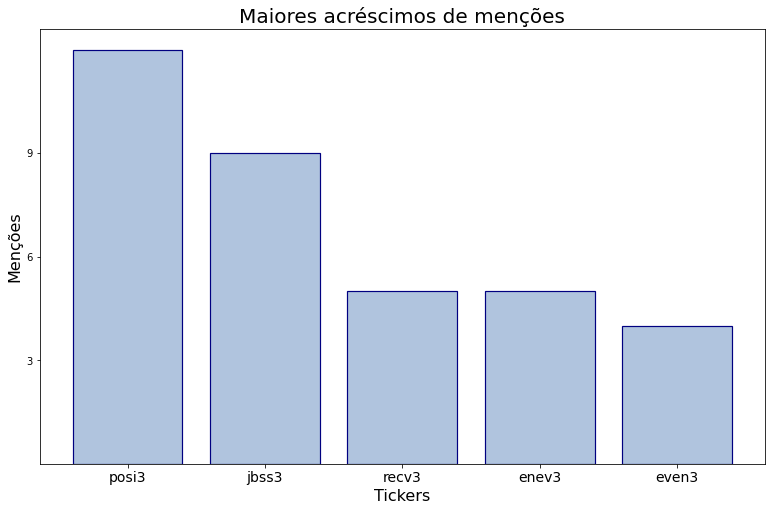

In [33]:
x = varTot[:5]

plt.figure(figsize=(13,8))

plt.bar(x['word'],x['Diff'], color='lightsteelblue', edgecolor= 'navy', linewidth=1.2) 
plt.title('Maiores acréscimos de menções', fontsize='20')
plt.xlabel('Tickers', fontsize='16')
plt.ylabel('Menções', fontsize='16')
plt.yticks([3,6,9])
plt.xticks(fontsize='14')

plt.show();

In [14]:
totEntra=totJ[totJ['count_x'] == 0]
totEntra= totEntra.drop(['count_x','count_y', 'Diff'], axis = 1)
totEntra

,word
160,vivt3
161,flry3
162,rcsl4
163,agxy3
164,bbas3
165,pdtc3
166,beef3
167,tris3
168,xyxz3
169,viva3


In [15]:
totSai=totJ[totJ['count_y'] == 0]
totSai= totSai.drop(['count_x','count_y', 'Diff'], axis = 1)
totSai

,word
36,even3
47,lcam3
62,tgma3
75,seql3
77,rail3
85,dexp3
86,cple6
97,brdt3
106,ptbl3
107,powe3


In [16]:
topEntra=topJ[topJ['count_y'] == 0]
topEntra= topEntra.drop(['count_x','count_y'], axis = 1)
topEntra

,word
4,posi3
9,recv3
13,enev3


In [17]:
topSai=topJ[topJ['count_x'] == 0]
topSai= topSai.drop(['count_x','count_y'], axis = 1)
topSai

,word
14,sqia3
15,pfrm3
16,fesa4
